Пашенюк Нікіта, К-10, Варіант 22, Викладач - Веклич

In [8]:
import networkx as nx
import matplotlib.pyplot as plt

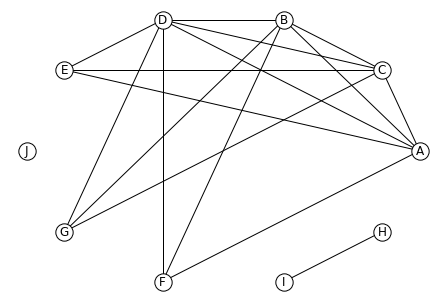

<Figure size 432x288 with 0 Axes>

In [9]:
My_graph_none_positions = nx.Graph()
My_graph_none_positions = nx.read_gexf('graph_file.gexf')
nx.draw_circular(My_graph_none_positions, font_color='black', edgecolors='black', edge_color='black',
                 node_color='white', with_labels=True)
plt.show()
plt.savefig('graph.jpeg')

Зображення графу з бібліотечним заданням вершин

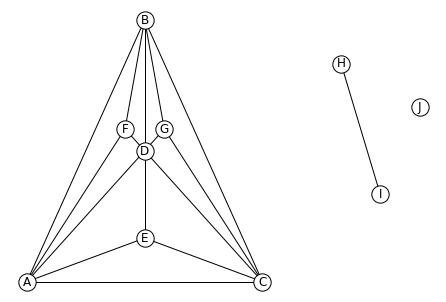

<Figure size 432x288 with 0 Axes>

In [10]:
My_graph = nx.Graph()
My_graph = nx.read_gexf('graph_file.gexf')
nodes_positions = {'A': [1, 4], 'C': [7, 4], 'B': [4, 10], 'D': [4, 7], 'E': [4, 5], 'J': [11, 8], 'G': [4.5, 7.5],
                   'F': [3.5, 7.5], 'I': [10, 6], 'H': [9, 9]}
nodes = nodes_positions.keys()
nx.draw(My_graph, pos=nodes_positions, font_color='black', edgecolors='black', edge_color='black', node_color='white',
        with_labels=True)
plt.show()
plt.savefig('graph_1.jpeg')

Зображення графу з заданням координат вершин

In [11]:
for connected_component in nx.connected_components(My_graph):
    print("------------------------")
    print(f'Connected component with nodes:{" ".join(My_graph.subgraph(connected_component))}')
    print(f'The number of edges is {My_graph.subgraph(connected_component).number_of_edges()}')
    print(f'The number of nodes is {My_graph.subgraph(connected_component).number_of_nodes()}')
    for node in My_graph.subgraph(connected_component):
        print(f'The degree of {node} is {My_graph.subgraph(connected_component).degree({node})}')
    print('Eccentricity: ', nx.eccentricity(My_graph.subgraph(connected_component)))
    print('Radius is', nx.radius(My_graph.subgraph(connected_component)))
    print('Diameter is', nx.diameter(My_graph.subgraph(connected_component)))
print("------------------------")

------------------------
Connected component with nodes:A C B D E G F
The number of edges is 15
The number of nodes is 7
The degree of A is [('A', 5)]
The degree of C is [('C', 5)]
The degree of B is [('B', 5)]
The degree of D is [('D', 6)]
The degree of E is [('E', 3)]
The degree of G is [('G', 3)]
The degree of F is [('F', 3)]
Eccentricity:  {'A': 2, 'C': 2, 'B': 2, 'D': 1, 'E': 2, 'G': 2, 'F': 2}
Radius is 1
Diameter is 2
------------------------
Connected component with nodes:J
The number of edges is 0
The number of nodes is 1
The degree of J is [('J', 0)]
Eccentricity:  {'J': 0}
Radius is 0
Diameter is 0
------------------------
Connected component with nodes:I H
The number of edges is 1
The number of nodes is 2
The degree of I is [('I', 1)]
The degree of H is [('H', 1)]
Eccentricity:  {'I': 1, 'H': 1}
Radius is 1
Diameter is 1
------------------------


Кількість вершин, ребер, степені вершин, ексцентриситету, радіуса та діаметра по кожній компоненті зв'язності

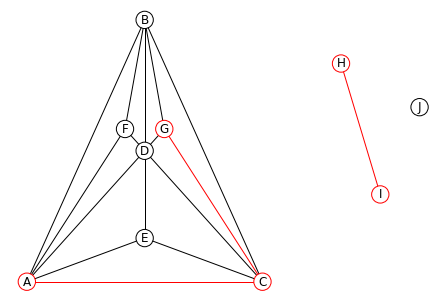

<Figure size 432x288 with 0 Axes>

In [12]:
def diameter(connected_component_in_diameter, edges_diameter_list, nodes_diameter_list):
    subgraph_diameter = nx.diameter(My_graph.subgraph(connected_component_in_diameter))
    for first_node in connected_component_in_diameter:
        for second_node in connected_component_in_diameter:
            if nx.shortest_path_length(My_graph.subgraph(connected_component_in_diameter), first_node,
                                       second_node) == subgraph_diameter:
                shortest_path = nx.shortest_path(My_graph.subgraph(connected_component_in_diameter), first_node,
                                                 second_node)
                edges_diameter = [(a, b) for a, b in zip(shortest_path, shortest_path[1:])]
                nodes_diameter = [c for c in shortest_path]
                edges_diameter_list.extend(edges_diameter)
                nodes_diameter_list.extend(nodes_diameter)
                return


def main_diameter():
    edges_diameter_list = []
    nodes_diameter_list = []
    for connected_component_in_diameter in nx.connected_components(My_graph):
        if nx.number_of_nodes(My_graph.subgraph(connected_component_in_diameter)) > 1:
            diameter(connected_component_in_diameter, edges_diameter_list, nodes_diameter_list)
    edge_color = ['r' if (first_node, second_node) in edges_diameter_list or (second_node, first_node) in
                         edges_diameter_list else 'black' for (first_node, second_node) in My_graph.edges()]
    node_color = ['r' if node in nodes_diameter_list else 'black' for node in
                  My_graph.nodes()]
    nx.draw(My_graph, pos=nodes_positions, font_color='black', edgecolors=node_color, edge_color=edge_color,
            node_color='white', with_labels=True)
    plt.show()
    plt.savefig('graph_2.jpeg')


main_diameter()

Зображення будь-якого діаметру по кожній компоненті зв'язності

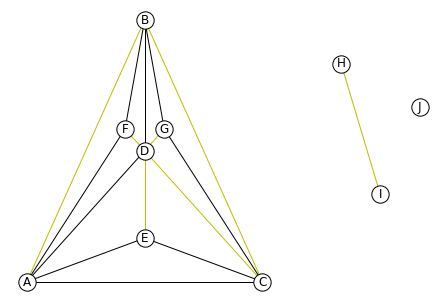

<Figure size 432x288 with 0 Axes>

In [13]:
def main_dfs():
    edges_dfs = [(node_1, node_2) for node_1, node_2 in nx.dfs_edges(My_graph)]
    edge_color = ['y' if (node_1, node_2) in edges_dfs or (node_2, node_1) in edges_dfs else 'black' for
                  (node_1, node_2) in My_graph.edges()]
    nx.draw(My_graph, pos=nodes_positions, font_color='black', edgecolors='black', edge_color=edge_color,
            node_color='white', with_labels=True)
    plt.show()
    plt.savefig('graph_3.jpeg')


main_dfs()

Зображення кістякового лісу